In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
ad = pd.read_csv("riceClassification.csv")
df = ad.copy()
df.head()


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [2]:
#Kütüphaneler tanımlandı ver head methodu ile geri seti gözlemlendi.

In [3]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [4]:
df.shape

(18185, 12)

In [5]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [6]:
df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


<AxesSubplot:>

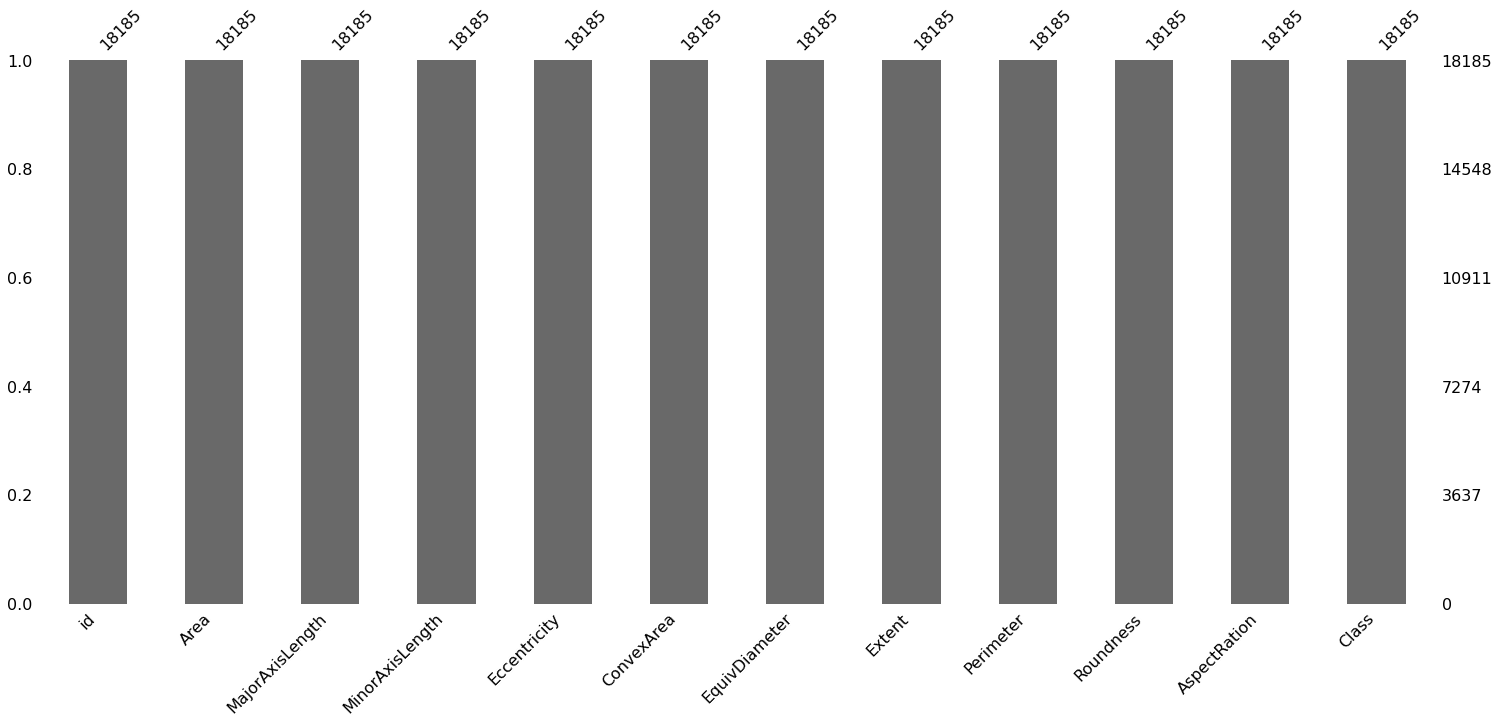

In [8]:
msno.bar(df)

In [9]:
#Veri seti nasıl ön işleme yapılacağıyla ilgili bilgiler elde edildi

In [10]:
print('Total number of 0(False count) are',(df['Class']==0).sum())
print('Total number of 1(True count) are',(df['Class']==1).sum())

Total number of 0(False count) are 8200
Total number of 1(True count) are 9985


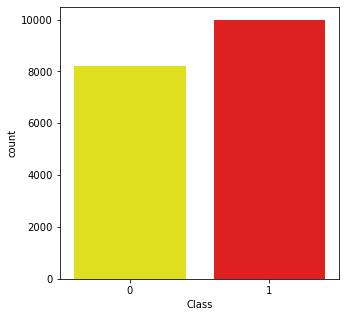

In [11]:
plt.figure(figsize=(5,5))
colors = ['yellow','red']
sns.countplot(x='Class',data=df,palette=colors)
plt.show()

In [12]:
df.drop(columns=['id'],inplace=True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [13]:
#veri setimde doğru ve yanlış değerlerin sayılarına bakıldı.

In [14]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


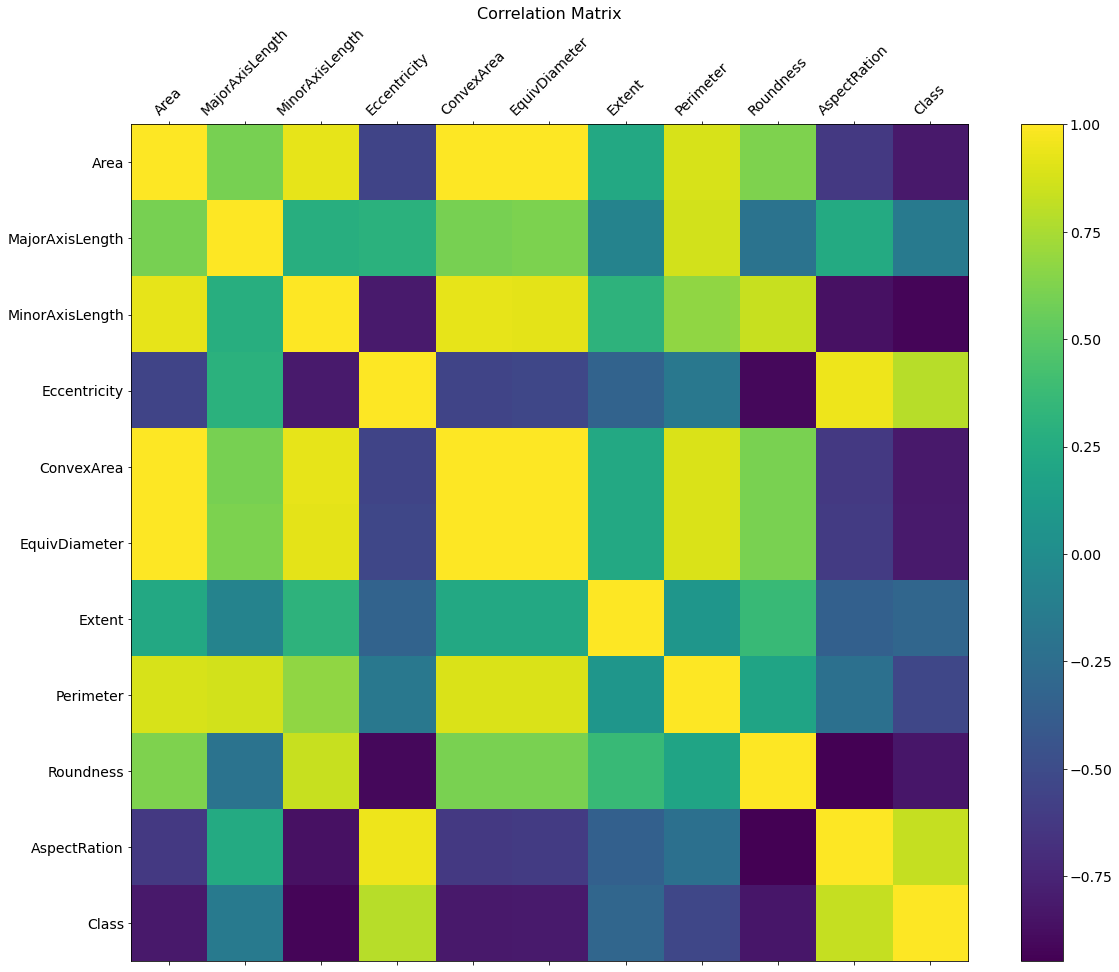

In [15]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [16]:
df.corr().nlargest(4,"Class").index

Index(['Class', 'AspectRation', 'Eccentricity', 'MajorAxisLength'], dtype='object')

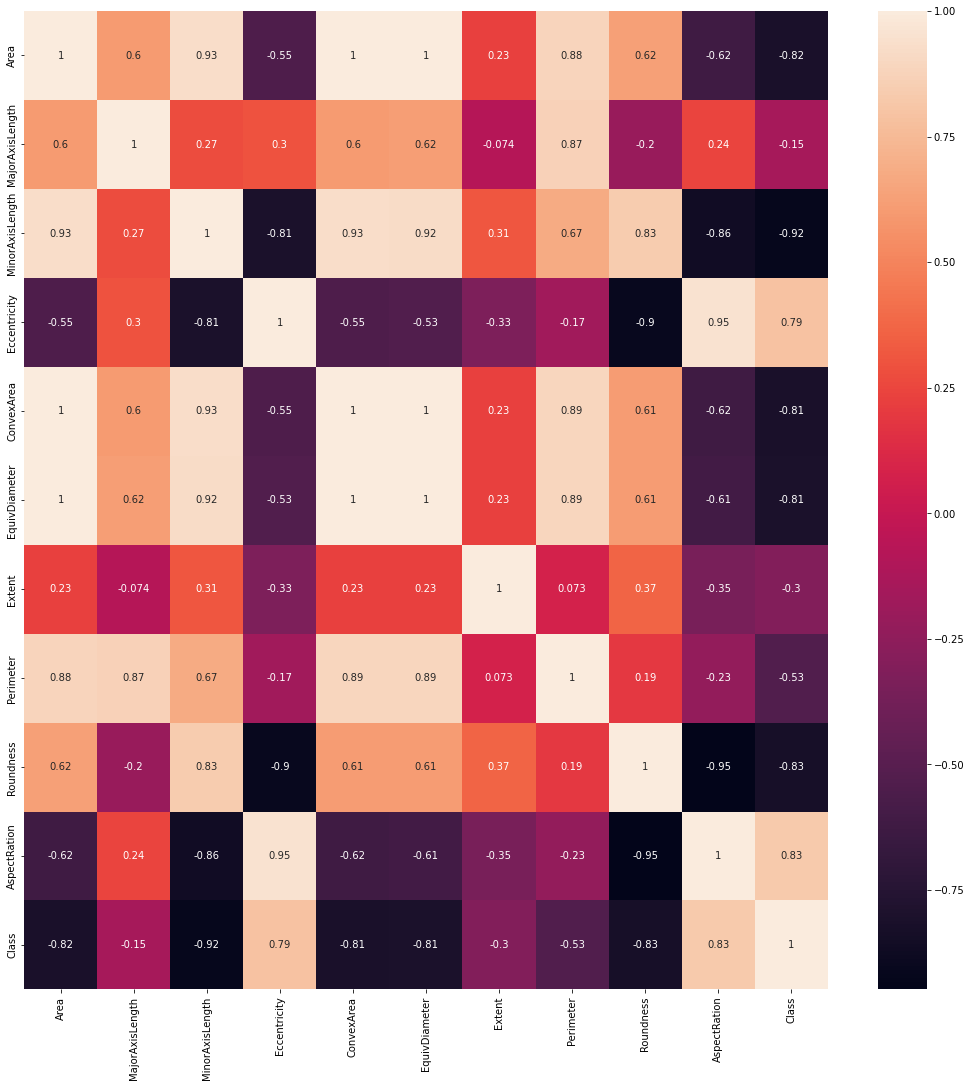

In [17]:
correlation_mat = df.corr()
corr_features = correlation_mat.index
plt.figure(figsize=(18,18))
g = sns.heatmap(df[corr_features].corr(),annot=True,)
plt.show()

In [18]:
#Veri setimde korelasyon verileri kontrol edildi ve ilişkilere bakıldı.

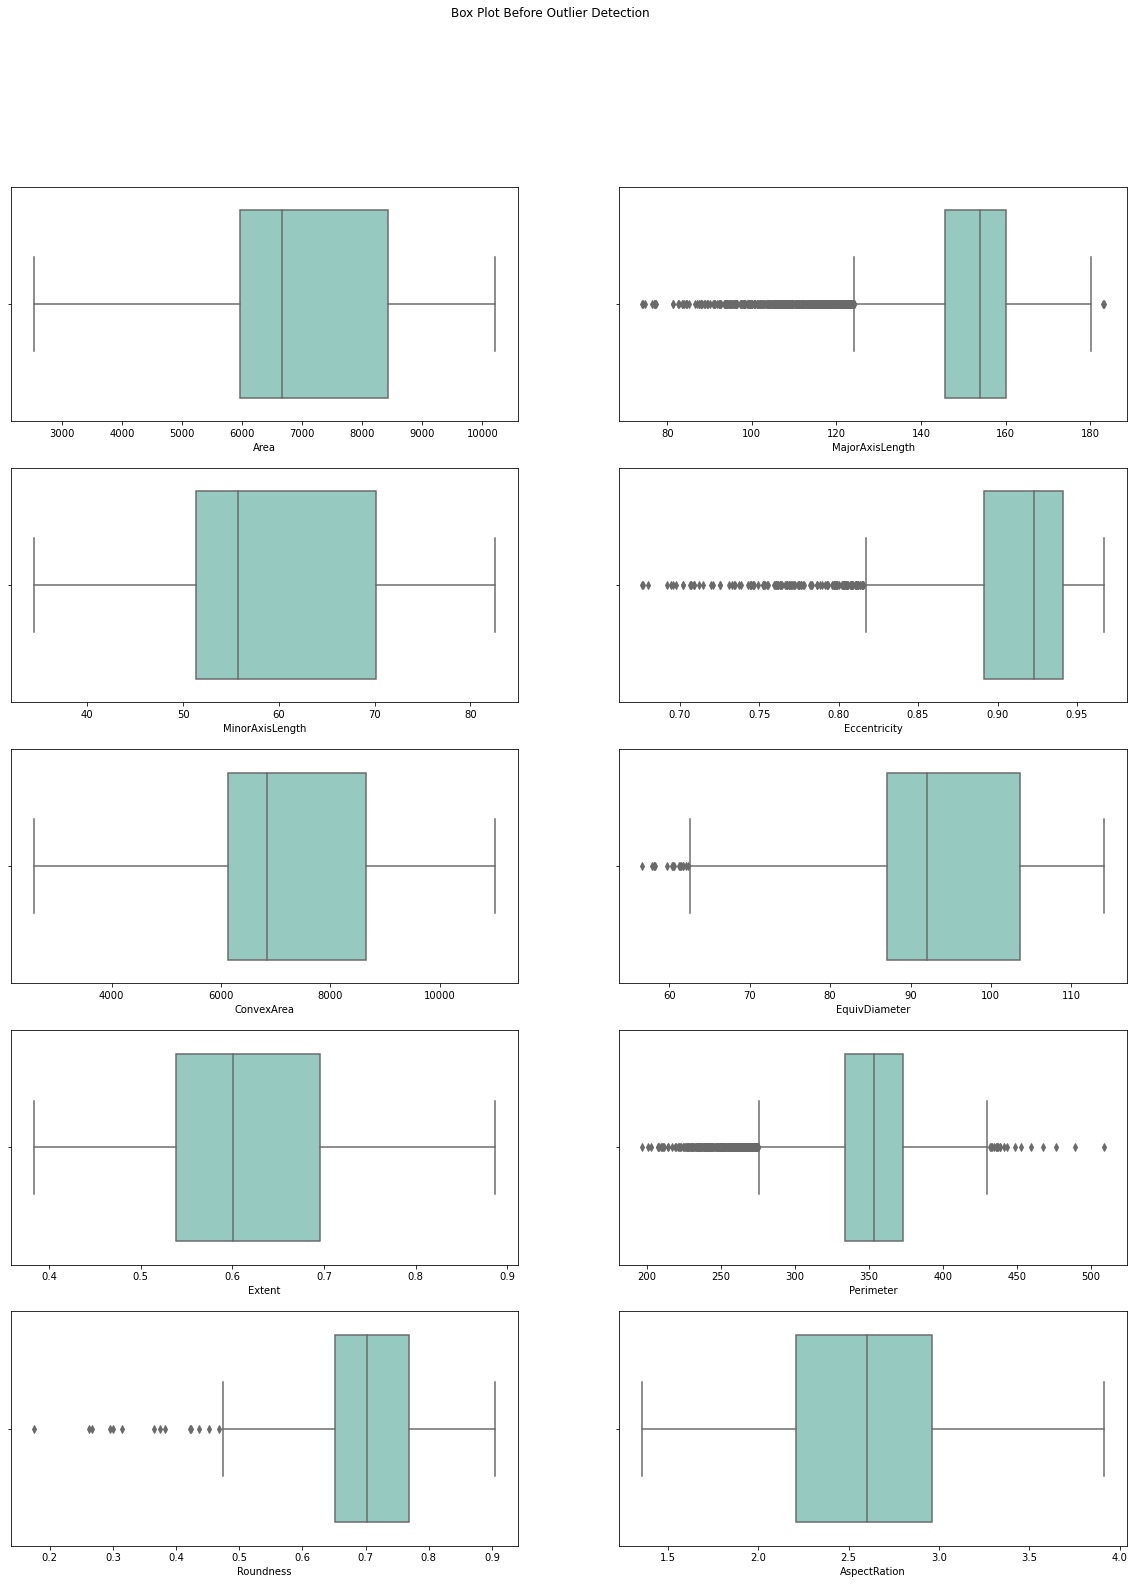

In [19]:
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=df.columns[k], palette='Set3')
        k=k+1

In [20]:
#aykırı değerlerin grafikte gösterilmesi.

In [21]:
main_df = df

In [22]:
##hesaplama kısmı

In [23]:
def iqr_calculation(main_df,col):
    Q1 = np.percentile(col,25,interpolation = 'midpoint')
    Q3 = np.percentile(col,75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(col>=(Q3+1.5*IQR))
    lower = np.where(col<=(Q1-1.5*IQR))
    return upper,lower

In [24]:
##indeks karar bulma test kısmı

In [25]:
def remove_outliers(main_df,upper,lower):
    main_df.drop(upper[0], inplace = True)
    main_df.drop(lower[0], inplace = True)
    print("New Shape: ", main_df.shape)
    return main_df

In [26]:
##data set resetleme kısmı

In [27]:
def reset_dataframe(main_df):
    main_df.reset_index(inplace=True)
    main_df.drop(columns=['index'],inplace=True)
    return main_df 

In [28]:
#methodlar çalıştı ve aykırı değerler bulundu ver temizlendi.

In [29]:
for i in range(0,len(main_df.columns)-1):
    print('For ',df.columns[i])
    upper, lower = iqr_calculation(main_df,df[df.columns[i]])
    main_df = remove_outliers(main_df,upper,lower)
    df_final = reset_dataframe(main_df)

For  Area
New Shape:  (18185, 11)
For  MajorAxisLength
New Shape:  (17647, 11)
For  MinorAxisLength
New Shape:  (17647, 11)
For  Eccentricity
New Shape:  (17631, 11)
For  ConvexArea
New Shape:  (17631, 11)
For  EquivDiameter
New Shape:  (17631, 11)
For  Extent
New Shape:  (17631, 11)
For  Perimeter
New Shape:  (17602, 11)
For  Roundness
New Shape:  (17597, 11)
For  AspectRation
New Shape:  (17597, 11)


In [30]:
#temizlemiş veri setim

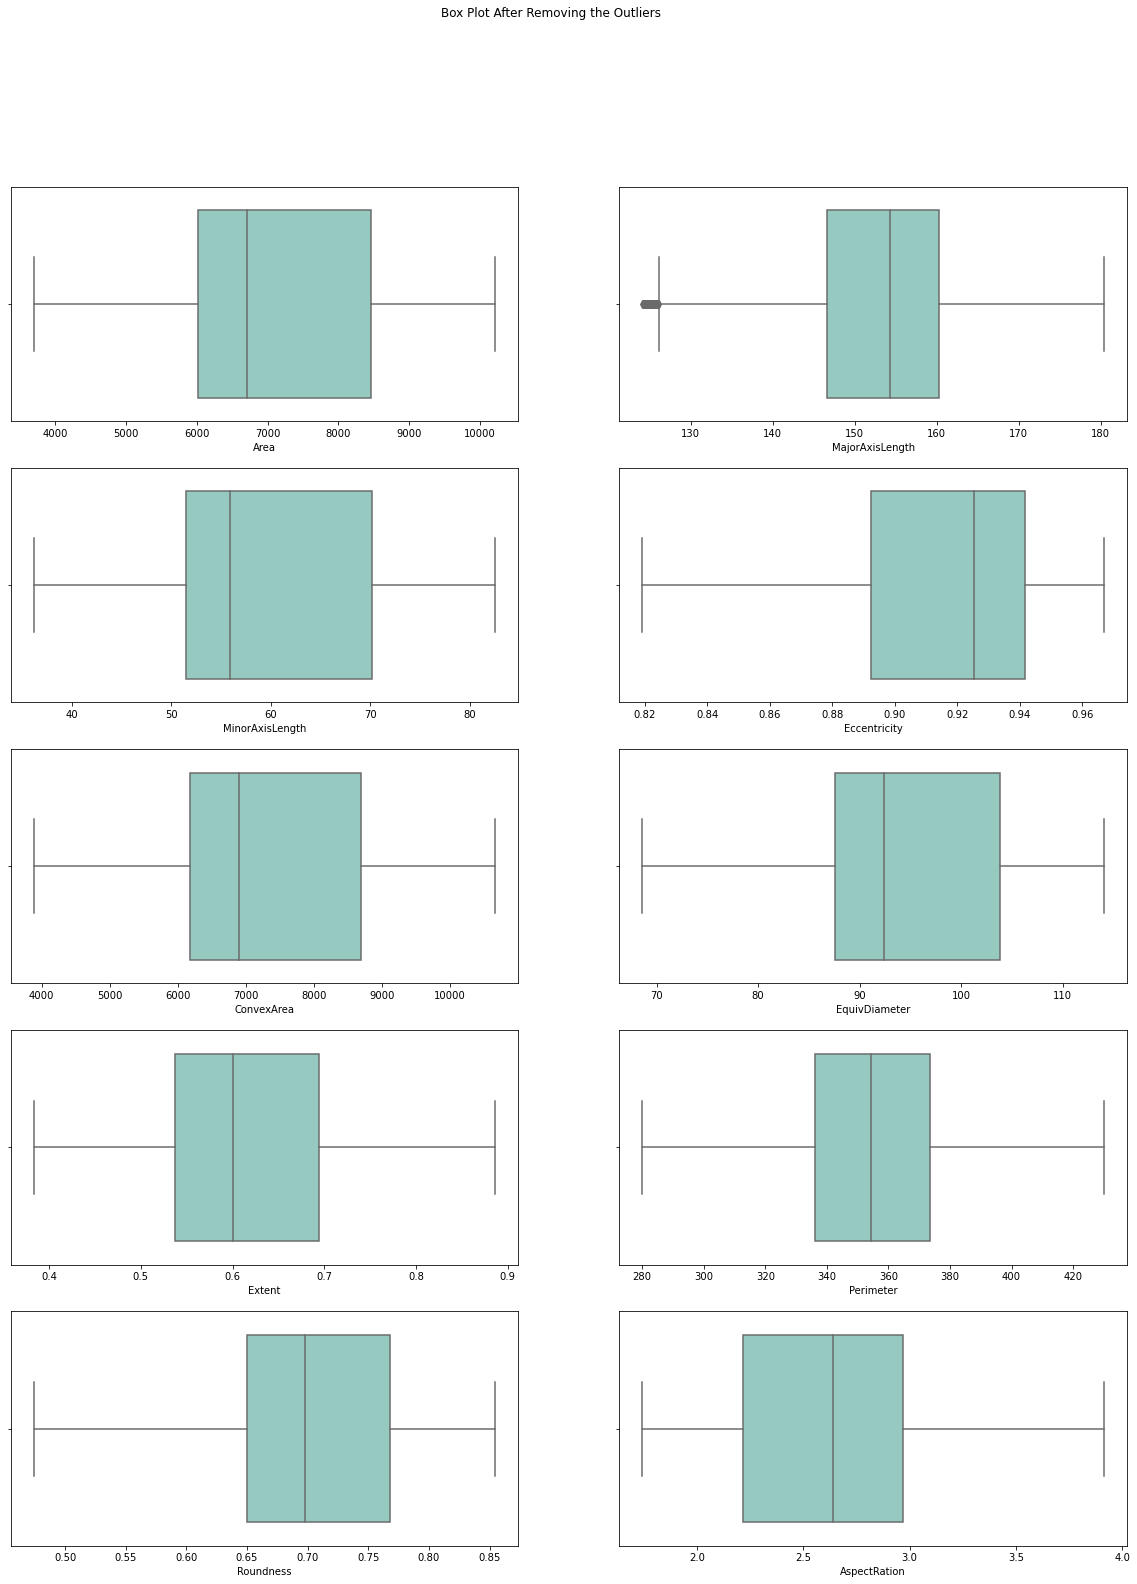

In [31]:
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot After Removing the Outliers')
k = 0
for i in range(0,5):
    for j in range(0,2):
        col_name = df_final.columns[k]
        sns.boxplot(ax=axes[i,j], data=df_final,x=col_name,palette='Set3')
        k=k+1

In [32]:
#temizlennmiş veri grafik gösterimi

In [33]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)

In [34]:
#lojistik regresyon model oluşturdum

In [35]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [36]:
loj_model.intercept_

array([-0.00644723])

In [37]:
loj_model.coef_

array([[ 0.00215791,  0.11717594, -0.31117085, -0.00495574, -0.00841418,
        -0.29791373, -0.00399674,  0.2102015 , -0.00990447, -0.0014307 ]])

In [38]:
y_pred = loj_model.predict(X)

In [39]:
confusion_matrix(y, y_pred)

array([[7941,  114],
       [  62, 9480]], dtype=int64)

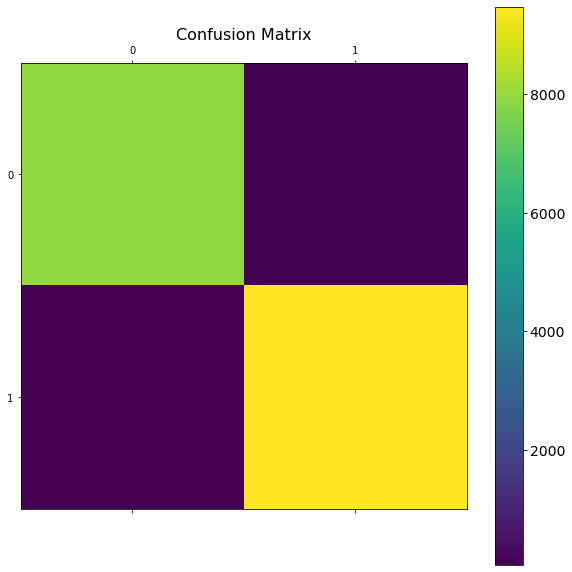

In [40]:
f = plt.figure(figsize=(10, 10))
plt.matshow(confusion_matrix(y,y_pred), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Confusion Matrix', fontsize=16);

In [41]:
#Confusion Matrix gösterimi

In [42]:
accuracy_score(y, y_pred)

0.9899982951639484

In [43]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8055
           1       0.99      0.99      0.99      9542

    accuracy                           0.99     17597
   macro avg       0.99      0.99      0.99     17597
weighted avg       0.99      0.99      0.99     17597



In [44]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [45]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.99779468, 0.00220532],
       [0.99795453, 0.00204547],
       [0.91505175, 0.08494825],
       [0.9570177 , 0.0429823 ],
       [0.98560036, 0.01439964],
       [0.81910503, 0.18089497],
       [0.81178275, 0.18821725],
       [0.94158193, 0.05841807],
       [0.44662468, 0.55337532],
       [0.89600659, 0.10399341]])

In [46]:
y[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Class, dtype: int64

In [47]:
#modelimin bulduğu sonuçlarla gerçek sonuçları karşılaştırdım

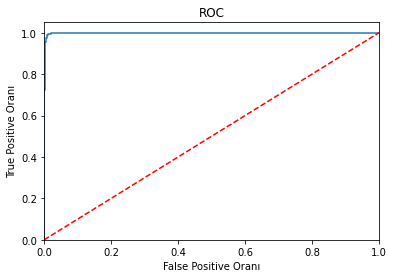

In [48]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [49]:
#roc değerleriyle inceleme yaptım

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)


In [51]:
#test train olarak veri stini ayırdım.

In [52]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [53]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9911363636363636

In [54]:
cross_val_score(loj_model, X_test, y_test, cv = 10)

array([0.99090909, 0.98863636, 0.98409091, 0.98863636, 0.99318182,
       0.99318182, 0.99090909, 0.99545455, 0.98636364, 0.99772727])

In [55]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9909090909090909

In [56]:
#lojistik regresyon kullanılarak cros validation score hesaplandı.

In [57]:
#Gaussian Naive Bayes

In [58]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [59]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [60]:
nb_model.predict(X_test)[0:10]

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [61]:
nb_model.predict_proba(X_test)[0:10]

array([[1.62959595e-14, 1.00000000e+00],
       [4.59027152e-03, 9.95409728e-01],
       [1.00000000e+00, 2.28483525e-39],
       [1.00000000e+00, 8.13298464e-31],
       [8.90167453e-11, 1.00000000e+00],
       [2.60589468e-33, 1.00000000e+00],
       [8.24260599e-13, 1.00000000e+00],
       [7.38878925e-24, 1.00000000e+00],
       [1.00000000e+00, 4.84463500e-19],
       [4.64163122e-14, 1.00000000e+00]])

In [62]:
y_pred = nb_model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.9788636363636364

In [64]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9795454545454545

In [65]:
# Gaussian Naive Bayes kullanılarak cros validation score hesaplandı.

In [66]:
##KNN

In [67]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [68]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [69]:
y_pred = knn_model.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred)

0.9836363636363636

In [71]:
# knn algoritması kullanılarak accuracy_score

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1995
           1       0.97      1.00      0.99      2405

    accuracy                           0.98      4400
   macro avg       0.98      0.98      0.98      4400
weighted avg       0.98      0.98      0.98      4400



In [73]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [74]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [75]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.983556700438808
En iyi parametreler: {'n_neighbors': 4}


In [76]:
knn = KNeighborsClassifier(4)
knn_tuned = knn.fit(X_train, y_train)

In [77]:
knn_tuned.score(X_test, y_test)

0.9861363636363636

In [78]:
y_pred = knn_tuned.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.9861363636363636

In [80]:
# knn algoritması model oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [81]:
##SVC MAKİNA

In [82]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [83]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [84]:
svm_model

SVC(kernel='linear')

In [85]:
y_pred = svm_model.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred)

0.9902272727272727

In [87]:
# svc modelini kullanılarak accuracy_score

In [88]:
svc_params = {"C": np.arange(1,5)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4])}, verbose=2)

In [89]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [90]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [91]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9902272727272727

In [92]:
# svc model oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [93]:
# RBF SVC

In [94]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [95]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [96]:
svc_model

SVC()

In [97]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9288636363636363

In [98]:
# rbf svc modelini kullanılarak accuracy_score

In [99]:
svc_params = {"C": [0.0001, 0.001, 0.1],
             "gamma": [0.0001, 0.001, 0.1]}

In [100]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1],
                         'gamma': [0.0001, 0.001, 0.1]},
             verbose=2)

In [101]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 0.1, 'gamma': 0.001}


In [102]:
svc_tuned = SVC(C = 0.1, gamma = 0.001).fit(X_train, y_train)

In [103]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9752272727272727

In [104]:
# rbf svc modelini oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [105]:
# YAPAY SİNİR AĞI

In [106]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [107]:
scaler = StandardScaler()

In [108]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
from sklearn.neural_network import MLPClassifier

In [110]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [111]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9911363636363636

In [112]:
#  yapay sinir ağı modelini  kullanılarak accuracy_score

In [113]:
mlpc

MLPClassifier()

In [114]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [115]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [116]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.005, 'hidden_layer_sizes': (5, 3), 'solver': 'lbfgs'}


In [117]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.005, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "lbfgs")

In [118]:
mlpc_tuned.fit(X_test_scaled, y_test)

MLPClassifier(activation='logistic', alpha=0.005,
              hidden_layer_sizes=(100, 100, 100), solver='lbfgs')

In [119]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9922727272727273

In [120]:
# yapay sinir ağı modelini oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [121]:
#CART

In [122]:
!pip install skompiler
from skompiler import skompile

In [123]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [124]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [125]:
cart_model

DecisionTreeClassifier()

In [126]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9856818181818182

In [127]:
#ağaç algoritması kullanılarak accuracy_score

In [128]:
cart_model

DecisionTreeClassifier()

In [129]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [130]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [131]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 4, 'min_samples_split': 10}


In [132]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 23)
cart_tuned = cart.fit(X_train, y_train)

In [133]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9902272727272727

In [134]:
#ağaç modelini  oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [135]:
#Random Forests

In [136]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [137]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [138]:
rf_model

RandomForestClassifier()

In [139]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9918181818181818

In [140]:
#Random Foreşt model kullanılarak accuracy_score

In [141]:
rf_model

RandomForestClassifier()

In [142]:
rf_params = {"max_depth": [2,5],
            "max_features": [2,5],
            "n_estimators": [10,500],
            "min_samples_split": [2,5]}

In [143]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [144]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5], 'max_features': [2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 500]},
             verbose=2)

In [145]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [146]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 5, 
                                  min_samples_split = 5,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=5,
                       n_estimators=500)

In [147]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9913636363636363

In [148]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

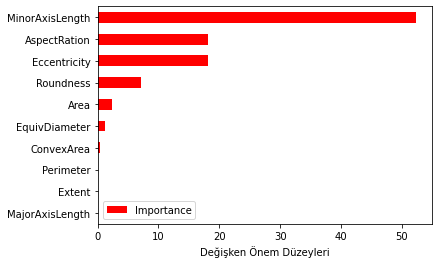

In [149]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [150]:
#Random Forest modelini  oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [151]:
#Gradient Boosting Machines

In [152]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [154]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [155]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9906818181818182

In [156]:
#Gradient Boosting Machines Model kullanılarak accuracy_score

In [157]:
gbm_model

GradientBoostingClassifier()

In [158]:
gbm_params = {"learning_rate" : [0.01, 0.1],
             "n_estimators": [100,500,],
             "max_depth": [3,5],
             "min_samples_split": [5,10]}

In [159]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [160]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 500]},
             verbose=2)

In [161]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 500}


In [162]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [163]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [164]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9904545454545455

In [165]:
#Gradient Boosting Machines modelini  oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [166]:
#XGBoost


In [167]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [168]:
!pip install xgboost
from xgboost import XGBClassifier

In [169]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [170]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [171]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9906818181818182

In [172]:
# XGBoost Model kullanılarak accuracy_score

In [173]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [174]:
xgb_params = {
        'n_estimators': [100, 500],
        'subsample': [0.6, 0.8],
        'max_depth': [3, 4],
        'learning_rate': [0.02,0.05],
        "min_samples_split": [5,10]}

In [175]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [176]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[19:45:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [177]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 4,
 'min_samples_split': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [178]:
xgb = XGBClassifier(learning_rate = 0.02, 
                    max_depth = 4,
                    min_samples_split = 5,
                    n_estimators = 100,
                    subsample = 0.6)

In [179]:
xgb_tuned =  xgb.fit(X_train,y_train)

[19:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [180]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.990909090909091

In [181]:
# XGBoost modelini  oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [182]:
# CatBoost

In [199]:
y = df_final["Class"]
X = df_final.drop(["Class"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [200]:
!pip install catboost
from catboost import CatBoostClassifier

In [201]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.031001
0:	learn: 0.6128165	total: 10.1ms	remaining: 10.1s
1:	learn: 0.5410517	total: 15.2ms	remaining: 7.59s
2:	learn: 0.4724199	total: 20.2ms	remaining: 6.73s
3:	learn: 0.4188300	total: 25.6ms	remaining: 6.37s
4:	learn: 0.3671537	total: 30.5ms	remaining: 6.07s
5:	learn: 0.3254920	total: 35.6ms	remaining: 5.9s
6:	learn: 0.2916133	total: 42.2ms	remaining: 5.99s
7:	learn: 0.2587316	total: 47.6ms	remaining: 5.9s
8:	learn: 0.2352533	total: 53.2ms	remaining: 5.85s
9:	learn: 0.2137489	total: 58.3ms	remaining: 5.77s
10:	learn: 0.1929300	total: 64.2ms	remaining: 5.78s
11:	learn: 0.1735379	total: 70.2ms	remaining: 5.78s
12:	learn: 0.1560110	total: 78.7ms	remaining: 5.97s
13:	learn: 0.1439838	total: 83.5ms	remaining: 5.88s
14:	learn: 0.1316021	total: 88.4ms	remaining: 5.81s
15:	learn: 0.1206546	total: 94ms	remaining: 5.78s
16:	learn: 0.1107817	total: 99ms	remaining: 5.72s
17:	learn: 0.1023993	total: 104ms	remaining: 5.7s
18:	learn: 0.0947278	total: 109ms	remaining: 5.65s
1

166:	learn: 0.0243860	total: 904ms	remaining: 4.51s
167:	learn: 0.0243773	total: 912ms	remaining: 4.51s
168:	learn: 0.0243379	total: 918ms	remaining: 4.51s
169:	learn: 0.0242907	total: 925ms	remaining: 4.52s
170:	learn: 0.0242646	total: 947ms	remaining: 4.59s
171:	learn: 0.0242399	total: 953ms	remaining: 4.59s
172:	learn: 0.0241967	total: 962ms	remaining: 4.6s
173:	learn: 0.0241675	total: 969ms	remaining: 4.6s
174:	learn: 0.0241561	total: 978ms	remaining: 4.61s
175:	learn: 0.0241138	total: 985ms	remaining: 4.61s
176:	learn: 0.0240970	total: 993ms	remaining: 4.62s
177:	learn: 0.0240564	total: 999ms	remaining: 4.62s
178:	learn: 0.0240071	total: 1.01s	remaining: 4.62s
179:	learn: 0.0239511	total: 1.01s	remaining: 4.61s
180:	learn: 0.0238965	total: 1.02s	remaining: 4.64s
181:	learn: 0.0238516	total: 1.03s	remaining: 4.63s
182:	learn: 0.0238373	total: 1.04s	remaining: 4.63s
183:	learn: 0.0237939	total: 1.04s	remaining: 4.63s
184:	learn: 0.0237705	total: 1.05s	remaining: 4.63s
185:	learn: 0.

327:	learn: 0.0194723	total: 1.8s	remaining: 3.69s
328:	learn: 0.0194620	total: 1.81s	remaining: 3.68s
329:	learn: 0.0194434	total: 1.81s	remaining: 3.68s
330:	learn: 0.0194007	total: 1.82s	remaining: 3.67s
331:	learn: 0.0193671	total: 1.82s	remaining: 3.67s
332:	learn: 0.0193312	total: 1.83s	remaining: 3.66s
333:	learn: 0.0192827	total: 1.83s	remaining: 3.66s
334:	learn: 0.0192623	total: 1.84s	remaining: 3.65s
335:	learn: 0.0192496	total: 1.84s	remaining: 3.64s
336:	learn: 0.0192403	total: 1.85s	remaining: 3.63s
337:	learn: 0.0192076	total: 1.85s	remaining: 3.63s
338:	learn: 0.0191793	total: 1.86s	remaining: 3.62s
339:	learn: 0.0191685	total: 1.86s	remaining: 3.62s
340:	learn: 0.0191585	total: 1.87s	remaining: 3.61s
341:	learn: 0.0191314	total: 1.87s	remaining: 3.6s
342:	learn: 0.0191314	total: 1.88s	remaining: 3.59s
343:	learn: 0.0190936	total: 1.88s	remaining: 3.59s
344:	learn: 0.0190835	total: 1.89s	remaining: 3.58s
345:	learn: 0.0190458	total: 1.89s	remaining: 3.57s
346:	learn: 0.

505:	learn: 0.0153735	total: 2.71s	remaining: 2.64s
506:	learn: 0.0153661	total: 2.71s	remaining: 2.64s
507:	learn: 0.0153586	total: 2.72s	remaining: 2.63s
508:	learn: 0.0153383	total: 2.72s	remaining: 2.63s
509:	learn: 0.0153042	total: 2.73s	remaining: 2.62s
510:	learn: 0.0152970	total: 2.73s	remaining: 2.62s
511:	learn: 0.0152970	total: 2.74s	remaining: 2.61s
512:	learn: 0.0152800	total: 2.74s	remaining: 2.6s
513:	learn: 0.0152612	total: 2.75s	remaining: 2.6s
514:	learn: 0.0152480	total: 2.75s	remaining: 2.59s
515:	learn: 0.0152419	total: 2.76s	remaining: 2.59s
516:	learn: 0.0152232	total: 2.76s	remaining: 2.58s
517:	learn: 0.0151853	total: 2.77s	remaining: 2.58s
518:	learn: 0.0151513	total: 2.77s	remaining: 2.57s
519:	learn: 0.0151334	total: 2.78s	remaining: 2.56s
520:	learn: 0.0151084	total: 2.79s	remaining: 2.56s
521:	learn: 0.0151031	total: 2.79s	remaining: 2.55s
522:	learn: 0.0150860	total: 2.8s	remaining: 2.55s
523:	learn: 0.0150620	total: 2.8s	remaining: 2.54s
524:	learn: 0.01

680:	learn: 0.0145431	total: 3.42s	remaining: 1.6s
681:	learn: 0.0145357	total: 3.42s	remaining: 1.59s
682:	learn: 0.0145333	total: 3.43s	remaining: 1.59s
683:	learn: 0.0145172	total: 3.43s	remaining: 1.59s
684:	learn: 0.0144893	total: 3.44s	remaining: 1.58s
685:	learn: 0.0144774	total: 3.44s	remaining: 1.58s
686:	learn: 0.0144774	total: 3.45s	remaining: 1.57s
687:	learn: 0.0144774	total: 3.45s	remaining: 1.56s
688:	learn: 0.0144450	total: 3.46s	remaining: 1.56s
689:	learn: 0.0144450	total: 3.46s	remaining: 1.55s
690:	learn: 0.0144450	total: 3.46s	remaining: 1.55s
691:	learn: 0.0144185	total: 3.47s	remaining: 1.54s
692:	learn: 0.0143945	total: 3.47s	remaining: 1.54s
693:	learn: 0.0143673	total: 3.48s	remaining: 1.53s
694:	learn: 0.0143457	total: 3.48s	remaining: 1.53s
695:	learn: 0.0143399	total: 3.49s	remaining: 1.52s
696:	learn: 0.0143189	total: 3.5s	remaining: 1.52s
697:	learn: 0.0143131	total: 3.5s	remaining: 1.51s
698:	learn: 0.0142905	total: 3.5s	remaining: 1.51s
699:	learn: 0.01

864:	learn: 0.0136859	total: 4.13s	remaining: 645ms
865:	learn: 0.0136859	total: 4.13s	remaining: 640ms
866:	learn: 0.0136859	total: 4.14s	remaining: 635ms
867:	learn: 0.0136859	total: 4.14s	remaining: 630ms
868:	learn: 0.0136859	total: 4.14s	remaining: 625ms
869:	learn: 0.0136859	total: 4.15s	remaining: 620ms
870:	learn: 0.0136859	total: 4.15s	remaining: 615ms
871:	learn: 0.0136859	total: 4.16s	remaining: 610ms
872:	learn: 0.0136859	total: 4.16s	remaining: 605ms
873:	learn: 0.0136859	total: 4.16s	remaining: 600ms
874:	learn: 0.0136859	total: 4.17s	remaining: 595ms
875:	learn: 0.0136859	total: 4.17s	remaining: 590ms
876:	learn: 0.0136859	total: 4.17s	remaining: 586ms
877:	learn: 0.0136859	total: 4.18s	remaining: 581ms
878:	learn: 0.0136859	total: 4.18s	remaining: 576ms
879:	learn: 0.0136859	total: 4.18s	remaining: 571ms
880:	learn: 0.0136859	total: 4.19s	remaining: 566ms
881:	learn: 0.0136859	total: 4.19s	remaining: 561ms
882:	learn: 0.0136859	total: 4.2s	remaining: 556ms
883:	learn: 0

In [202]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9913636363636363

In [194]:
# CatBoost Model kullanılarak accuracy_score

In [205]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.1],
    'depth': [3,5] }

In [207]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 0.6694637	total: 3.42ms	remaining: 1.71s
1:	learn: 0.6478247	total: 7.13ms	remaining: 1.78s
2:	learn: 0.6221526	total: 11.1ms	remaining: 1.85s
3:	learn: 0.6029675	total: 14.8ms	remaining: 1.83s
4:	learn: 0.5803911	total: 18.4ms	remaining: 1.82s
5:	learn: 0.5628655	total: 22.3ms	remaining: 1.83s
6:	learn: 0.5430967	total: 25.8ms	remaining: 1.82s
7:	learn: 0.5209485	total: 29.6ms	remaining: 1.82s
8:	learn: 0.5033058	total: 32.9ms	remaining: 1.8s
9:	learn: 0.4876261	total: 36.9ms	remaining: 1.81s
10:	learn: 0.4713866	total: 40.1ms	remaining: 1.78s
11:	learn: 0.4538367	total: 43.7ms	remaining: 1.78s
12:	learn: 0.4371347	total: 47.5ms	remaining: 1.78s
13:	learn: 0.4195672	total: 54.6ms	remaining: 1.9s
14:	learn: 0.4048544	total: 59.1ms	remaining: 1.91s
15:	learn: 0.3908895	total: 62.8ms	remaining: 1.9s
16:	learn: 0.3767766	total: 66.4ms	remaining: 1.89s
17:	learn: 0.3629605	total: 70ms	remaining: 1.87s
18:	learn: 0.351523

191:	learn: 0.0361038	total: 718ms	remaining: 1.15s
192:	learn: 0.0360263	total: 722ms	remaining: 1.15s
193:	learn: 0.0359713	total: 726ms	remaining: 1.15s
194:	learn: 0.0359239	total: 730ms	remaining: 1.14s
195:	learn: 0.0358258	total: 733ms	remaining: 1.14s
196:	learn: 0.0357525	total: 737ms	remaining: 1.13s
197:	learn: 0.0356757	total: 741ms	remaining: 1.13s
198:	learn: 0.0356212	total: 745ms	remaining: 1.13s
199:	learn: 0.0355520	total: 749ms	remaining: 1.12s
200:	learn: 0.0354733	total: 753ms	remaining: 1.12s
201:	learn: 0.0354305	total: 756ms	remaining: 1.11s
202:	learn: 0.0353762	total: 760ms	remaining: 1.11s
203:	learn: 0.0353083	total: 763ms	remaining: 1.11s
204:	learn: 0.0352395	total: 767ms	remaining: 1.1s
205:	learn: 0.0351791	total: 770ms	remaining: 1.1s
206:	learn: 0.0351171	total: 774ms	remaining: 1.09s
207:	learn: 0.0350483	total: 777ms	remaining: 1.09s
208:	learn: 0.0349820	total: 781ms	remaining: 1.09s
209:	learn: 0.0349215	total: 786ms	remaining: 1.08s
210:	learn: 0.

384:	learn: 0.0306041	total: 1.43s	remaining: 427ms
385:	learn: 0.0305962	total: 1.43s	remaining: 424ms
386:	learn: 0.0305871	total: 1.44s	remaining: 420ms
387:	learn: 0.0305794	total: 1.44s	remaining: 416ms
388:	learn: 0.0305687	total: 1.44s	remaining: 412ms
389:	learn: 0.0305628	total: 1.45s	remaining: 409ms
390:	learn: 0.0305510	total: 1.47s	remaining: 409ms
391:	learn: 0.0305391	total: 1.47s	remaining: 405ms
392:	learn: 0.0305332	total: 1.47s	remaining: 402ms
393:	learn: 0.0305201	total: 1.48s	remaining: 398ms
394:	learn: 0.0305054	total: 1.48s	remaining: 394ms
395:	learn: 0.0304914	total: 1.49s	remaining: 391ms
396:	learn: 0.0304823	total: 1.49s	remaining: 387ms
397:	learn: 0.0304687	total: 1.49s	remaining: 383ms
398:	learn: 0.0304578	total: 1.5s	remaining: 379ms
399:	learn: 0.0304451	total: 1.5s	remaining: 375ms
400:	learn: 0.0304358	total: 1.5s	remaining: 371ms
401:	learn: 0.0304275	total: 1.51s	remaining: 367ms
402:	learn: 0.0304147	total: 1.51s	remaining: 363ms
403:	learn: 0.0

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [208]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [209]:
catb = CatBoostClassifier(iterations = 500, 
                          learning_rate = 0.01, 
                          depth = 3)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6694637	total: 4.5ms	remaining: 2.25s
1:	learn: 0.6478247	total: 7.82ms	remaining: 1.95s
2:	learn: 0.6221526	total: 10.9ms	remaining: 1.81s
3:	learn: 0.6029675	total: 14.4ms	remaining: 1.78s
4:	learn: 0.5803911	total: 17.5ms	remaining: 1.73s
5:	learn: 0.5628655	total: 21ms	remaining: 1.73s
6:	learn: 0.5430967	total: 24.2ms	remaining: 1.71s
7:	learn: 0.5209485	total: 27.3ms	remaining: 1.68s
8:	learn: 0.5033058	total: 30.9ms	remaining: 1.69s
9:	learn: 0.4876261	total: 34.3ms	remaining: 1.68s
10:	learn: 0.4713866	total: 38ms	remaining: 1.69s
11:	learn: 0.4538367	total: 41.4ms	remaining: 1.68s
12:	learn: 0.4371347	total: 44.5ms	remaining: 1.67s
13:	learn: 0.4195672	total: 47.6ms	remaining: 1.65s
14:	learn: 0.4048544	total: 51ms	remaining: 1.65s
15:	learn: 0.3908895	total: 54.4ms	remaining: 1.65s
16:	learn: 0.3767766	total: 57.4ms	remaining: 1.63s
17:	learn: 0.3629605	total: 60.8ms	remaining: 1.63s
18:	learn: 0.3515232	total: 64.4ms	remaining: 1.63s
19:	learn: 0.3415467	total: 6

206:	learn: 0.0351171	total: 712ms	remaining: 1.01s
207:	learn: 0.0350483	total: 715ms	remaining: 1s
208:	learn: 0.0349820	total: 719ms	remaining: 1s
209:	learn: 0.0349215	total: 722ms	remaining: 998ms
210:	learn: 0.0348711	total: 726ms	remaining: 994ms
211:	learn: 0.0348051	total: 729ms	remaining: 991ms
212:	learn: 0.0347469	total: 734ms	remaining: 989ms
213:	learn: 0.0346897	total: 738ms	remaining: 986ms
214:	learn: 0.0346445	total: 741ms	remaining: 983ms
215:	learn: 0.0345789	total: 745ms	remaining: 979ms
216:	learn: 0.0345264	total: 748ms	remaining: 976ms
217:	learn: 0.0344741	total: 752ms	remaining: 973ms
218:	learn: 0.0344142	total: 756ms	remaining: 970ms
219:	learn: 0.0343666	total: 759ms	remaining: 966ms
220:	learn: 0.0343127	total: 763ms	remaining: 963ms
221:	learn: 0.0342688	total: 767ms	remaining: 961ms
222:	learn: 0.0342287	total: 771ms	remaining: 957ms
223:	learn: 0.0341916	total: 774ms	remaining: 953ms
224:	learn: 0.0341504	total: 777ms	remaining: 949ms
225:	learn: 0.0340

414:	learn: 0.0302556	total: 1.43s	remaining: 292ms
415:	learn: 0.0302396	total: 1.43s	remaining: 289ms
416:	learn: 0.0302218	total: 1.43s	remaining: 286ms
417:	learn: 0.0302135	total: 1.44s	remaining: 282ms
418:	learn: 0.0302045	total: 1.44s	remaining: 279ms
419:	learn: 0.0301953	total: 1.45s	remaining: 275ms
420:	learn: 0.0301826	total: 1.45s	remaining: 272ms
421:	learn: 0.0301690	total: 1.45s	remaining: 269ms
422:	learn: 0.0301613	total: 1.46s	remaining: 265ms
423:	learn: 0.0301558	total: 1.46s	remaining: 262ms
424:	learn: 0.0301476	total: 1.46s	remaining: 258ms
425:	learn: 0.0301414	total: 1.47s	remaining: 255ms
426:	learn: 0.0301348	total: 1.47s	remaining: 252ms
427:	learn: 0.0301230	total: 1.47s	remaining: 248ms
428:	learn: 0.0301144	total: 1.48s	remaining: 244ms
429:	learn: 0.0301044	total: 1.48s	remaining: 241ms
430:	learn: 0.0300973	total: 1.48s	remaining: 237ms
431:	learn: 0.0300881	total: 1.49s	remaining: 234ms
432:	learn: 0.0300757	total: 1.49s	remaining: 230ms
433:	learn: 

In [210]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9913636363636363

In [211]:
# CatBoost modelini  oluşturdum parametreler  elde edilerek en iyi sonuç bulundu.

In [212]:
#DENEME

In [215]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 98.6136%
----------------------------
LogisticRegression:
Accuracy: 99.1136%
----------------------------
SVC:
Accuracy: 97.5227%
----------------------------
GaussianNB:
Accuracy: 97.8864%
----------------------------
DecisionTreeClassifier:
Accuracy: 99.0227%
----------------------------
RandomForestClassifier:
Accuracy: 99.1364%
----------------------------
GradientBoostingClassifier:
Accuracy: 99.0455%
----------------------------
CatBoostClassifier:
Accuracy: 99.1364%
----------------------------
XGBClassifier:
Accuracy: 99.0909%


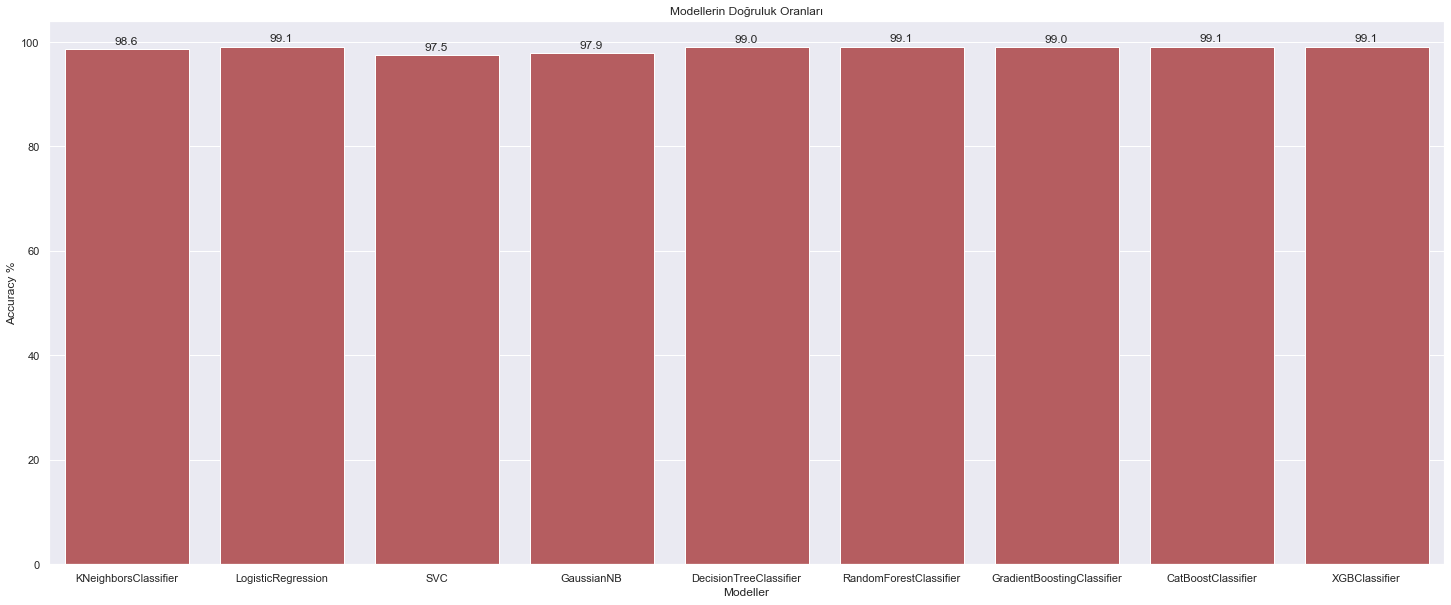

In [216]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

sns.set(rc={'figure.figsize':(25,10)})    
plot=sns.barplot(x= 'Modeller', y = 'Accuracy', data=sonuclar, color="r")

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
plt.ylabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');   



In [ ]:
#kulladığım tuned edilmiş modellerin çıktılarını ortak bir şekilde inceledim
